<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Prediction-Accuracy-(Comparison-of-single-user-predictions-across-models-with-increasing-number-of-trained-users)" data-toc-modified-id="Prediction-Accuracy-(Comparison-of-single-user-predictions-across-models-with-increasing-number-of-trained-users)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prediction Accuracy (Comparison of single user predictions across models with increasing number of trained users)</a></span><ul class="toc-item"><li><span><a href="#Descriptive-statistics-for-Model-(1)" data-toc-modified-id="Descriptive-statistics-for-Model-(1)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Descriptive statistics for Model (1)</a></span><ul class="toc-item"><li><span><a href="#Descriptive-statistics-for-Model-(400)" data-toc-modified-id="Descriptive-statistics-for-Model-(400)-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Descriptive statistics for Model (400)</a></span></li></ul></li><li><span><a href="#All-guesses-accuracy-(Lineplot)" data-toc-modified-id="All-guesses-accuracy-(Lineplot)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>All guesses accuracy (Lineplot)</a></span><ul class="toc-item"><li><span><a href="#Lineplot-for-Model-(1)" data-toc-modified-id="Lineplot-for-Model-(1)-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Lineplot for Model (1)</a></span></li><li><span><a href="#Lineplot-for-Model-(400)" data-toc-modified-id="Lineplot-for-Model-(400)-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Lineplot for Model (400)</a></span></li><li><span><a href="#Lineplot-for-Models-(1-&amp;-400)" data-toc-modified-id="Lineplot-for-Models-(1-&amp;-400)-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Lineplot for Models (1 &amp; 400)</a></span></li></ul></li><li><span><a href="#Accuracy-by-turn" data-toc-modified-id="Accuracy-by-turn-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Accuracy by turn</a></span><ul class="toc-item"><li><span><a href="#Highest-accuracy-epoch-(Model-1)" data-toc-modified-id="Highest-accuracy-epoch-(Model-1)-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Highest accuracy epoch (Model 1)</a></span></li><li><span><a href="#Highest-accuracy-epoch-(Model-400)" data-toc-modified-id="Highest-accuracy-epoch-(Model-400)-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Highest accuracy epoch (Model 400)</a></span></li><li><span><a href="#Highest-accuracy-epoch-for-both-Models-(Model-1-&amp;-Model-400)" data-toc-modified-id="Highest-accuracy-epoch-for-both-Models-(Model-1-&amp;-Model-400)-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Highest accuracy epoch for both Models (Model 1 &amp; Model 400)</a></span></li></ul></li><li><span><a href="#Accuracy-by-game-stages" data-toc-modified-id="Accuracy-by-game-stages-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Accuracy by game stages</a></span><ul class="toc-item"><li><span><a href="#Opening-accuracy" data-toc-modified-id="Opening-accuracy-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Opening accuracy</a></span></li><li><span><a href="#Middlegame-accuracy" data-toc-modified-id="Middlegame-accuracy-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Middlegame accuracy</a></span></li><li><span><a href="#Endgame-accuracy-(Upper-limit-at-100-turns)" data-toc-modified-id="Endgame-accuracy-(Upper-limit-at-100-turns)-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Endgame accuracy (Upper limit at 100 turns)</a></span></li><li><span><a href="#Endgame-accuracy-(No-upper-limit-for-turns)" data-toc-modified-id="Endgame-accuracy-(No-upper-limit-for-turns)-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Endgame accuracy (No upper limit for turns)</a></span></li><li><span><a href="#Boxplot-comparison-of-game-stages" data-toc-modified-id="Boxplot-comparison-of-game-stages-2.4.5"><span class="toc-item-num">2.4.5&nbsp;&nbsp;</span>Boxplot comparison of game stages</a></span></li></ul></li></ul></li></ul></div>

# Libraries

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
#OS libs
import os
# File management
from util_functions.file_management import (filter_by, sort_by, split_pred, split_data)
from util_functions.plot_predictions import (get_stats_for_all_predictions,
                                             plot_pdf_multiple_users,
                                             plot_cdf_multiple_users,
                                             plot_boxplot_multiple_users,
                                             get_stats_for_predictions_by_turn,
                                             plot_single_acc_by_turn,
                                             get_mean_of_predictions_by_turn,
                                             get_predictions_by_game_stage_from_turn,
                                             boxplot_game_stages,
                                             boxplot_game_stages_w_benchmark_lines,
                                             plot_single_accuracy_line,
                                             unique_predictions)
#Data handling libs
import pandas as pd

data_folder = os.path.join(os.getcwd(),'dt_chess','datasets')
dt_pred_folder = os.path.join(os.getcwd(),'dt_chess','m1_10_epochs','predictions')
pred_files_user = os.listdir(dt_pred_folder)
dt_pred_400_folder = os.path.join(os.getcwd(),'dt_chess','m400_10_epochs','predictions')
pred_files_400_user = os.listdir(dt_pred_400_folder)
user_id = 400
all_acc_stats = ["top_1_accuracy", "engine_choice_2_accuracy", "engine_choice_3_accuracy",
                 "top_2_accuracy", "top_3_accuracy"]
top_k_acc = ["top_1_accuracy", "top_2_accuracy", "top_3_accuracy"]
hist_stat='count'

# Prediction Accuracy (Comparison of single user predictions across models with increasing number of trained users)

## Descriptive statistics for Model (1)

In [58]:
pred_files_user = sort_by(pred_files_user, split_pred, [('user_epochs', False)])

user_df = get_stats_for_all_predictions(dt_pred_folder, pred_files_user, data_folder)
user_df.index += 1
display(user_df.head().style.format(thousands=','))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:27<00:00,  2.77s/it]


,total,fp,tp1,tp2,tp3,tn1,tn2,tn3,top_1_accuracy,engine_choice_2_accuracy,engine_choice_3_accuracy,top_2_accuracy,top_3_accuracy
1,"124,601","19,104","29,499","15,479","10,142","95,102","79,623","69,481",23.674770,12.422854,8.139582,36.097624,44.237205
2,"124,607","13,962","35,264","17,083","10,541","89,343","72,260","61,719",28.300176,13.709503,8.459396,42.009678,50.469075
3,"124,603","11,943","37,532","17,562","10,744","87,071","69,509","58,765",30.121265,14.094364,8.622585,44.215629,52.838214
4,"124,611","11,525","38,006","17,470","10,777","86,605","69,135","58,358",30.499715,14.019629,8.648514,44.519344,53.167858
5,"124,602","11,578","37,599","17,597","10,645","87,003","69,406","58,761",30.175278,14.122566,8.543202,44.297844,52.841046


In [59]:
user_df.describe()[all_acc_stats]

,top_1_accuracy,engine_choice_2_accuracy,engine_choice_3_accuracy,top_2_accuracy,top_3_accuracy
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,28.238163,13.616099,8.586062,41.854263,50.440325
std,1.980925,0.491999,0.180486,2.468176,2.589970
min,23.674770,12.422854,8.139582,36.097624,44.237205
25%,27.569700,13.464802,8.558983,41.029525,49.676781
50%,28.412300,13.662847,8.635550,42.075147,50.666890
75%,29.728704,13.949576,8.672440,43.734331,52.396206
max,30.499715,14.122566,8.779744,44.519344,53.167858


### Descriptive statistics for Model (400)

In [60]:
pred_files_400_user = sort_by(pred_files_400_user, split_pred, [('user_epochs', False)])

user_400_df = get_stats_for_all_predictions(dt_pred_400_folder, pred_files_400_user, data_folder)
user_400_df.index += 1
display(user_400_df.head().style.format(thousands=','))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:29<00:00,  2.99s/it]


,total,fp,tp1,tp2,tp3,tn1,tn2,tn3,top_1_accuracy,engine_choice_2_accuracy,engine_choice_3_accuracy,top_2_accuracy,top_3_accuracy
1,"124,603","7,342","39,659","18,401","11,615","84,944","66,543","54,928",31.828287,14.767702,9.321605,46.595989,55.917594
2,"124,602","6,327","46,024","19,817","11,778","78,578","58,761","46,983",36.936807,15.904239,9.452497,52.841046,62.293543
3,"124,601","5,507","47,247","19,927","11,620","77,354","57,427","45,807",37.918636,15.992649,9.325768,53.911285,63.237053
4,"124,606","5,326","47,354","20,066","11,656","77,252","57,186","45,530",38.002985,16.103558,9.354285,54.106544,63.460829
5,"124,599","5,580","46,975","19,875","11,590","77,624","57,749","46,159",37.700945,15.951171,9.301840,53.652116,62.953956


In [61]:
user_400_df.describe()[all_acc_stats]

,top_1_accuracy,engine_choice_2_accuracy,engine_choice_3_accuracy,top_2_accuracy,top_3_accuracy
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,35.078186,15.397709,9.230582,50.475896,59.706478
std,2.405843,0.561111,0.143425,2.958993,3.060420
min,31.828287,14.767702,9.042540,46.595989,55.917594
25%,33.125354,14.835799,9.089158,47.994054,57.045641
50%,34.554495,15.371430,9.275021,49.860122,59.030334
75%,37.509910,15.939438,9.324727,53.449348,62.788853
max,38.002985,16.103558,9.452497,54.106544,63.460829


## All guesses accuracy (Lineplot)

### Lineplot for Model (1)

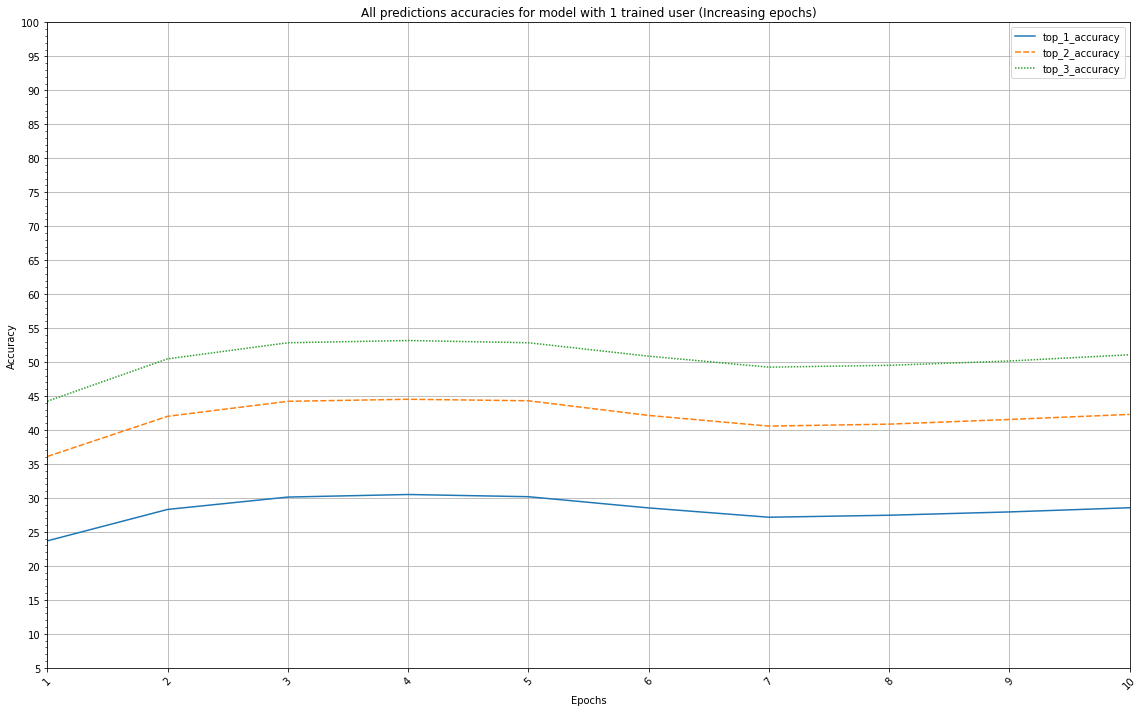

In [62]:
%matplotlib inline
plot_single_accuracy_line(user_df, top_k_acc, x_label='Epochs',
                          title=("All predictions accuracies for model with 1 trained "
                                 "user (Increasing epochs)"))

### Lineplot for Model (400)

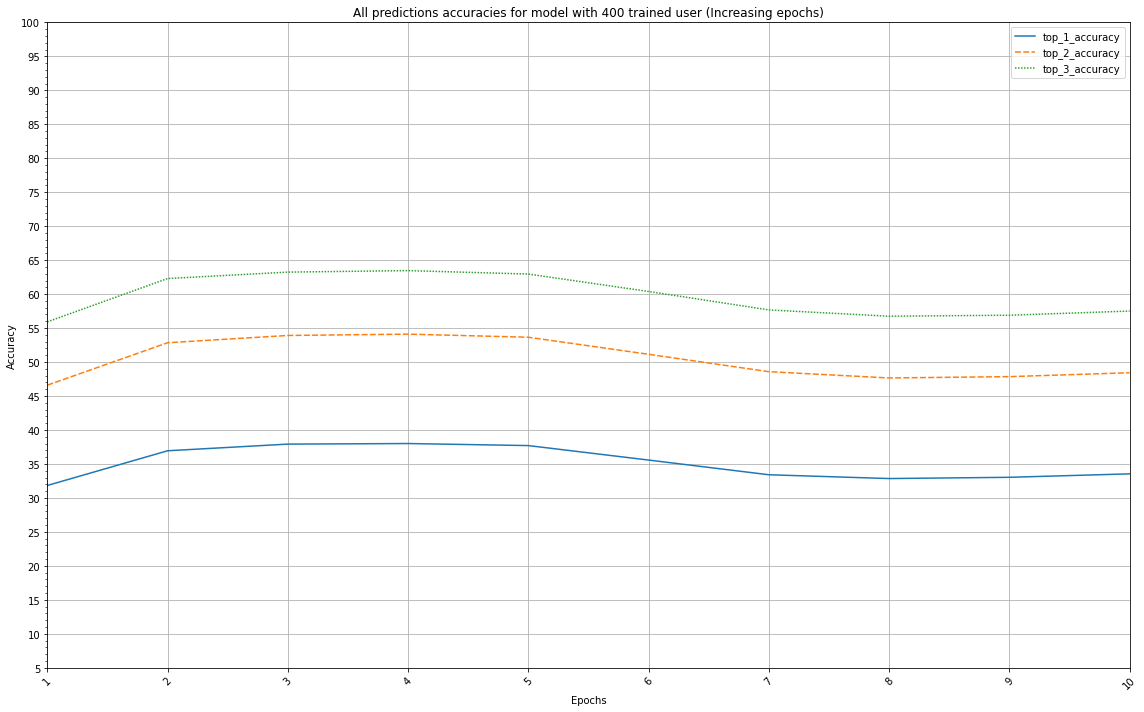

In [63]:
%matplotlib inline
plot_single_accuracy_line(user_400_df, top_k_acc, x_label='Epochs',
                          title=("All predictions accuracies for model with 400 trained "
                                 "user (Increasing epochs)"))

### Lineplot for Models (1 & 400)

In [64]:
m1_top_k = {f'top_{i}_accuracy':f'model_1_top_{i}_accuracy' for i in range(1,4)}
m400_top_k = {f'top_{i}_accuracy':f'model_400_top_{i}_accuracy' for i in range(1,4)}
#user_df.columns

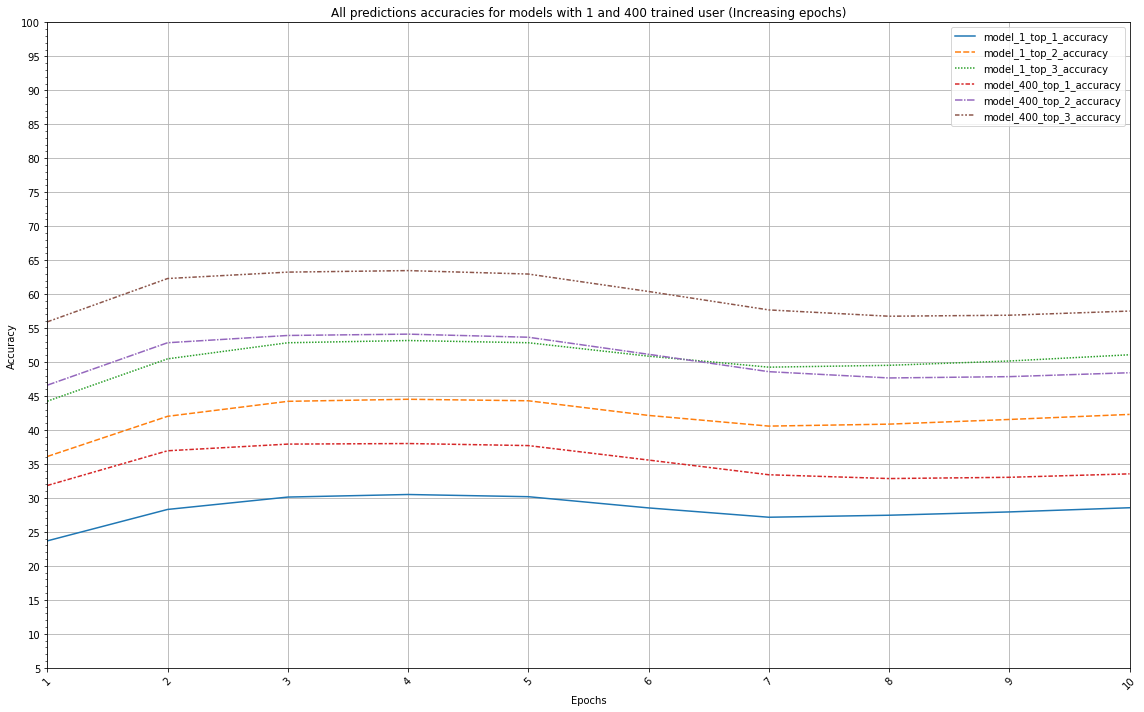

In [65]:
%matplotlib inline
m1_df = user_df.copy(deep=True)
m1_df.rename(columns=m1_top_k, inplace=True)
m400_df = user_400_df.copy(deep=True)
m400_df.rename(columns=m400_top_k, inplace=True)
plot_single_accuracy_line(pd.concat([m1_df, m400_df], axis=1),
                          list(m1_top_k.values()) + list(m400_top_k.values()), x_label='Epochs',
                          title=("All predictions accuracies for models with 1 and 400 trained "
                                 "user (Increasing epochs)"))

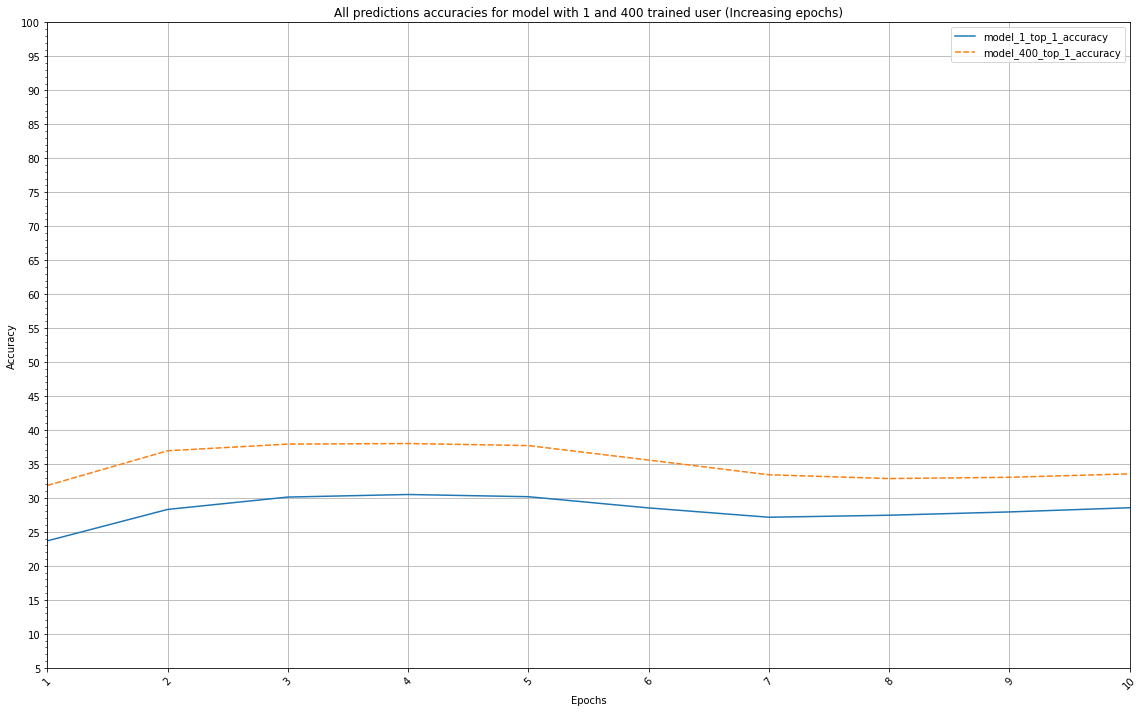

In [66]:
%matplotlib inline
plot_single_accuracy_line(pd.concat([m1_df, m400_df], axis=1),
                          list(m1_top_k.values())[:1] + list(m400_top_k.values())[:1], x_label='Epochs',
                          title=("All predictions accuracies for model with 1 and 400 trained "
                                 "user (Increasing epochs)"))

## Accuracy by turn

In [67]:
user_turn_df = get_stats_for_predictions_by_turn(dt_pred_folder, pred_files_user, data_folder)
user_400_turn_df = get_stats_for_predictions_by_turn(dt_pred_400_folder, pred_files_400_user, data_folder)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:27<00:00,  2.70s/it]


### Highest accuracy epoch (Model 1)

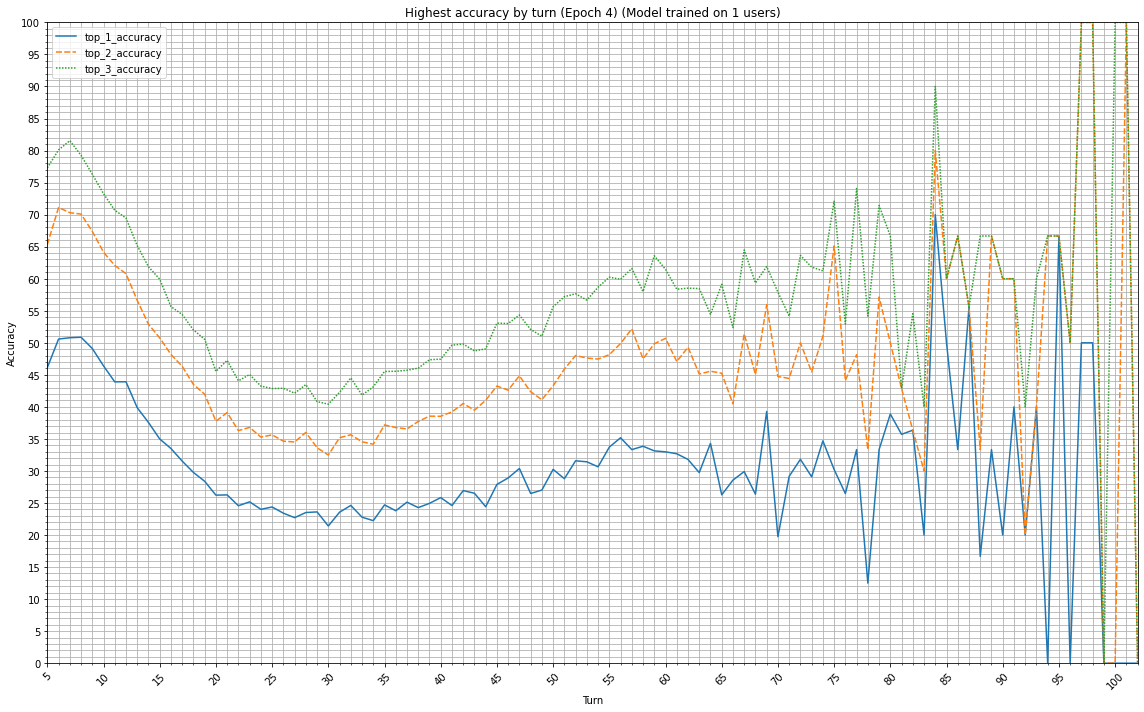

In [72]:
i, _ = (user_df['top_1_accuracy'].idxmax(), 85)
plot_single_acc_by_turn(user_turn_df[pred_files_user[i-1][:-len('.csv')]][top_k_acc],
                        title=(f"Highest accuracy by turn (Epoch {i}) "
                               f"(Model trained on 1 users)"))

### Highest accuracy epoch (Model 400)

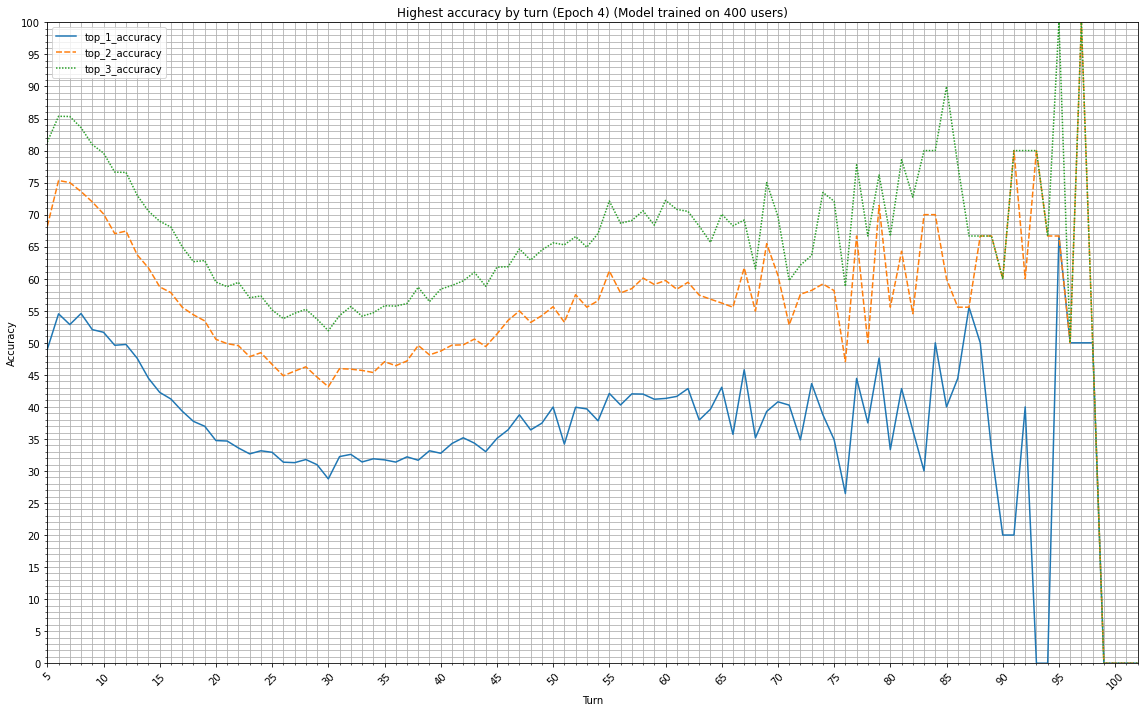

In [73]:
i, _ = (user_400_df['top_1_accuracy'].idxmax(), 85)
plot_single_acc_by_turn(user_400_turn_df[pred_files_400_user[i-1][:-len('.csv')]][top_k_acc],
                        title=(f"Highest accuracy by turn (Epoch {i}) "
                               f"(Model trained on 400 users)"))

### Highest accuracy epoch for both Models (Model 1 & Model 400)

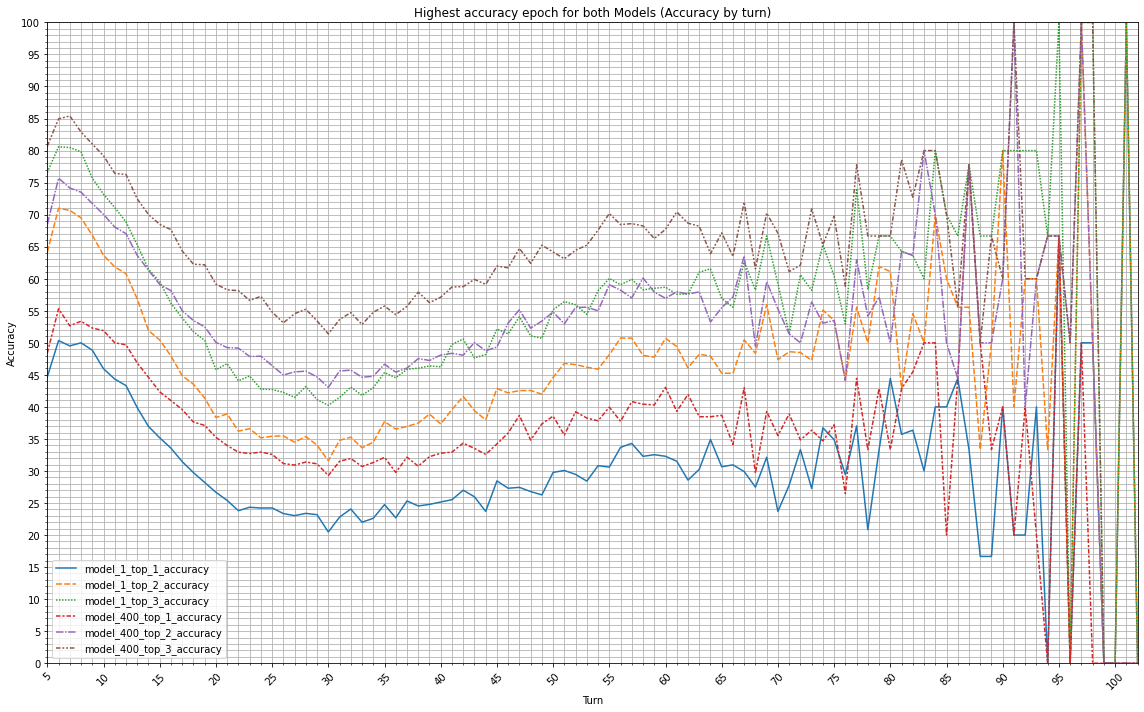

In [75]:
m1_turn_df = user_turn_df[pred_files_user[user_df['top_1_accuracy'].idxmax()][:-len('.csv')]].copy(deep=True)
m1_turn_df.rename(columns=m1_top_k, inplace=True)
m400_turn_df = user_400_turn_df[pred_files_400_user[user_400_df['top_1_accuracy'].idxmax()][:-len('.csv')]].copy(deep=True)
m400_turn_df.rename(columns=m400_top_k, inplace=True)
plot_single_acc_by_turn(pd.concat([m1_turn_df, m400_turn_df],
                                  axis=1)[list(m1_top_k.values()) + list(m400_top_k.values())],
                        title=("Highest accuracy epoch for both Models (Accuracy by turn)"))

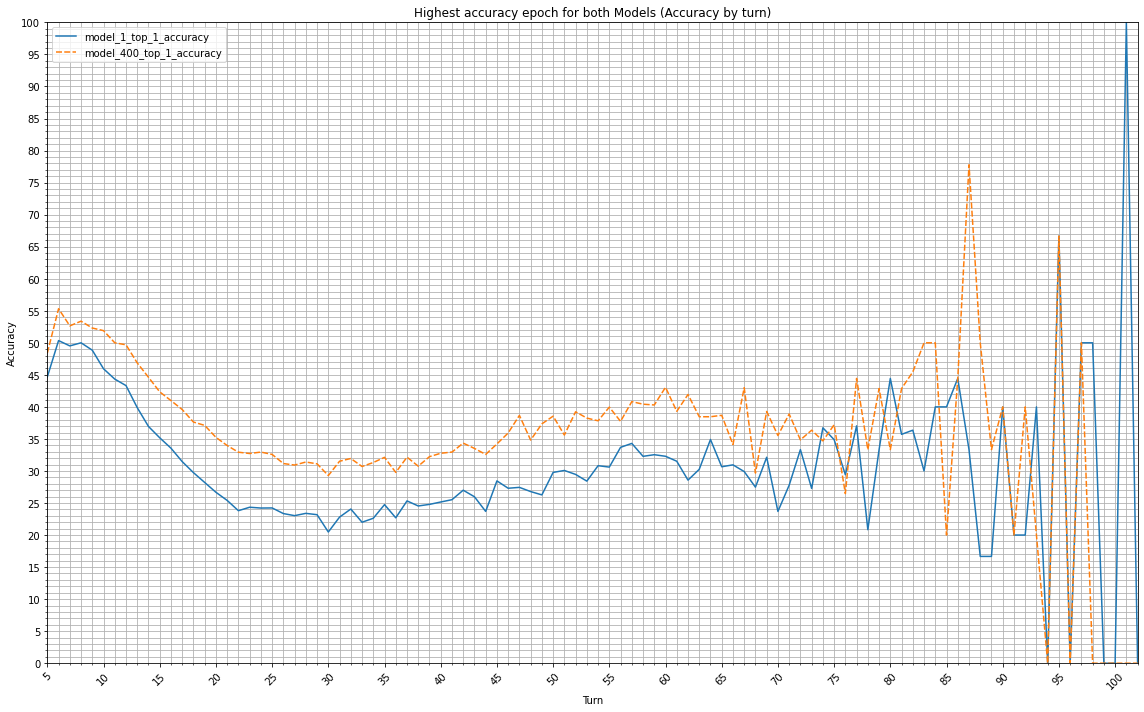

In [76]:
plot_single_acc_by_turn(pd.concat([m1_turn_df, m400_turn_df],
                                  axis=1)[list(m1_top_k.values())[:1] + list(m400_top_k.values())[:1]],
                        title=("Highest accuracy epoch for both Models (Accuracy by turn)"))

## Accuracy by game stages

In [88]:
idx_separate = [15, 40, 100]
df_opening, df_middle, df_end = get_predictions_by_game_stage_from_turn(user_turn_df, idx_separate,
                                                                        all_acc_stats)
_, _, df_end_uncapped = get_predictions_by_game_stage_from_turn(user_turn_df, idx_separate[:2],
                                                                all_acc_stats)
df_opening_400, df_middle_400, df_end_400 = get_predictions_by_game_stage_from_turn(user_400_turn_df,
                                                                                    idx_separate,
                                                                                    all_acc_stats)
_, _, df_end_uncapped_400 = get_predictions_by_game_stage_from_turn(user_400_turn_df, idx_separate[:2],
                                                                    all_acc_stats)

### Opening accuracy

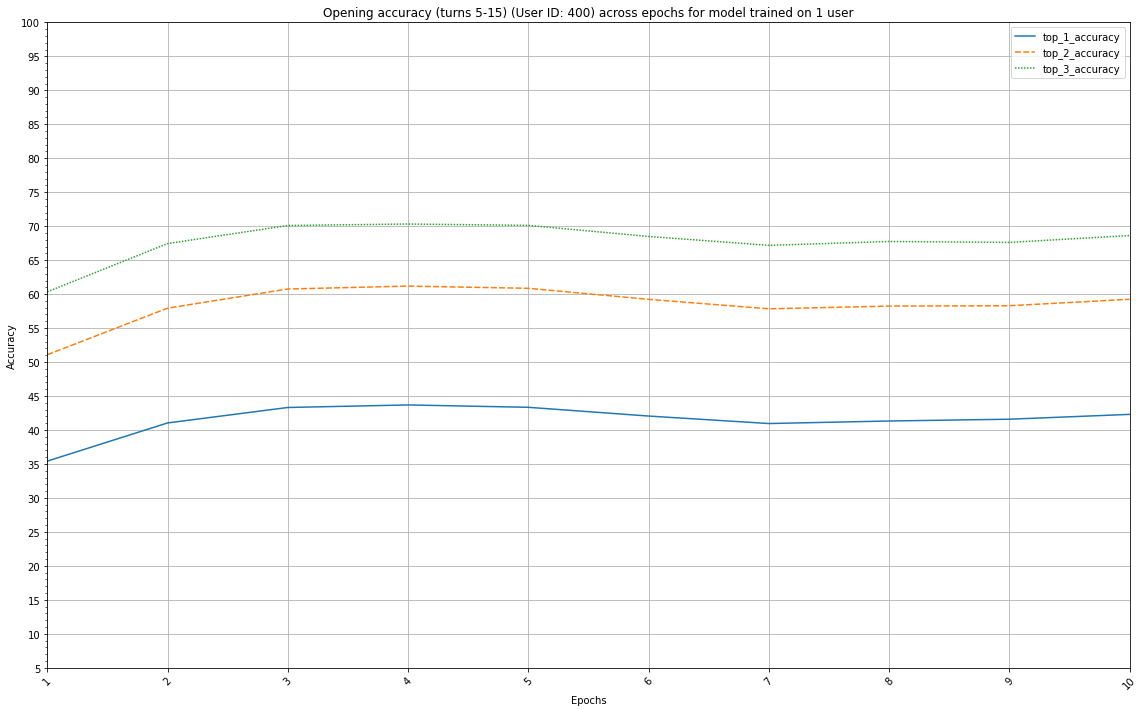

In [83]:
%matplotlib inline
plot_single_accuracy_line(df_opening, top_k_acc, x_label='Epochs',
                          title=(f"Opening accuracy (turns 5-{idx_separate[0]}) (User ID: {user_id})"
                                 " across epochs for model trained on 1 user"))

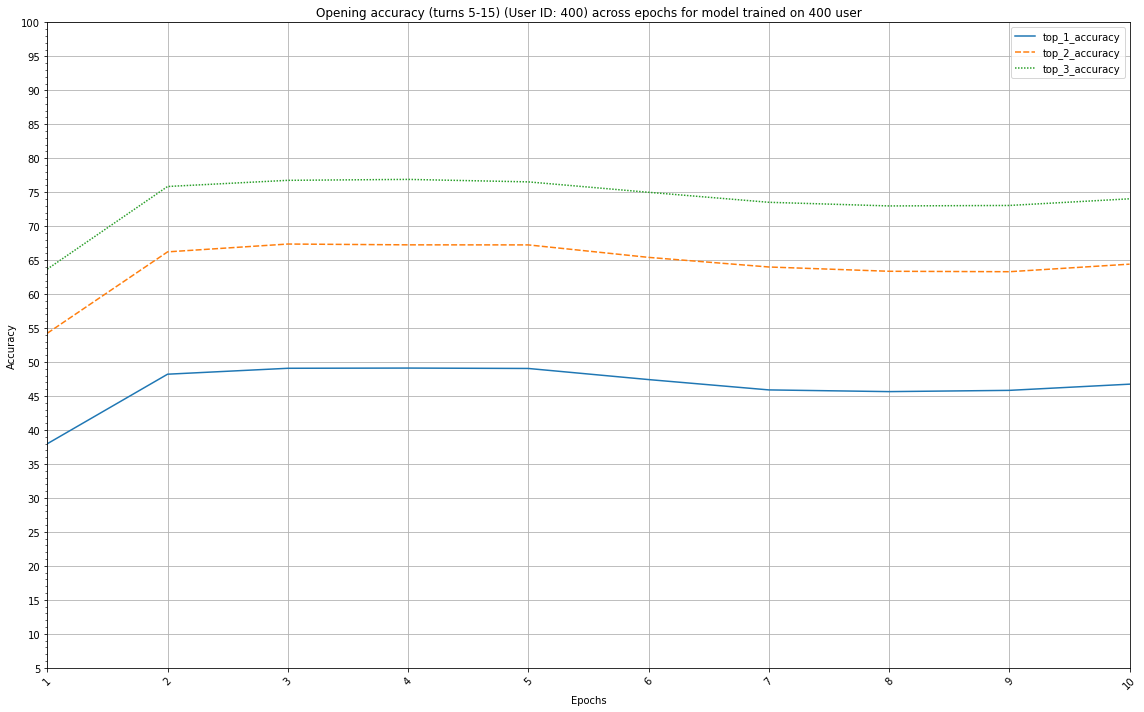

In [89]:
%matplotlib inline
plot_single_accuracy_line(df_opening_400, top_k_acc, x_label='Epochs',
                          title=(f"Opening accuracy (turns 5-{idx_separate[0]}) (User ID: {user_id})"
                                 " across epochs for model trained on 400 users"))

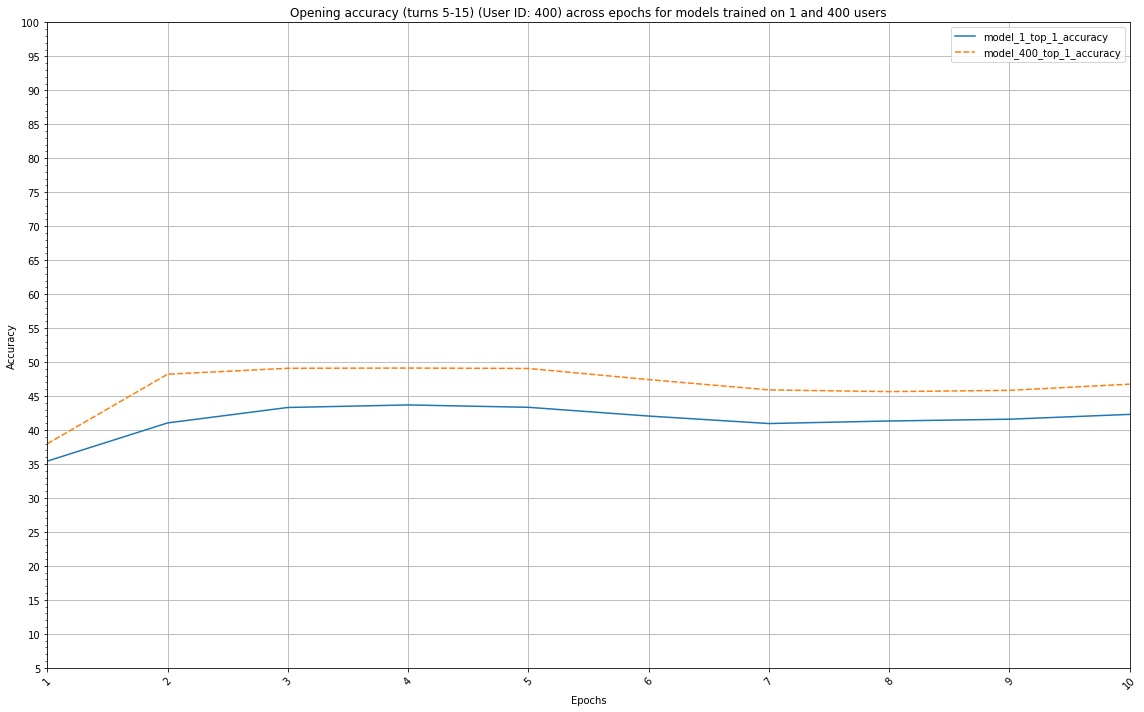

In [91]:
m1_temp_df = df_opening.copy(deep=True)
m1_temp_df.rename(columns=m1_top_k, inplace=True)
m400_temp_df = df_opening_400.copy(deep=True)
m400_temp_df.rename(columns=m400_top_k, inplace=True)
%matplotlib inline
plot_single_accuracy_line(pd.concat([m1_temp_df, m400_temp_df], axis=1),
                          list(m1_top_k.values())[:1] + list(m400_top_k.values())[:1], x_label='Epochs',
                          title=(f"Opening accuracy (turns 5-{idx_separate[0]}) (User ID: {user_id})"
                                 " across epochs for models trained on 1 and 400 users"))

### Middlegame accuracy

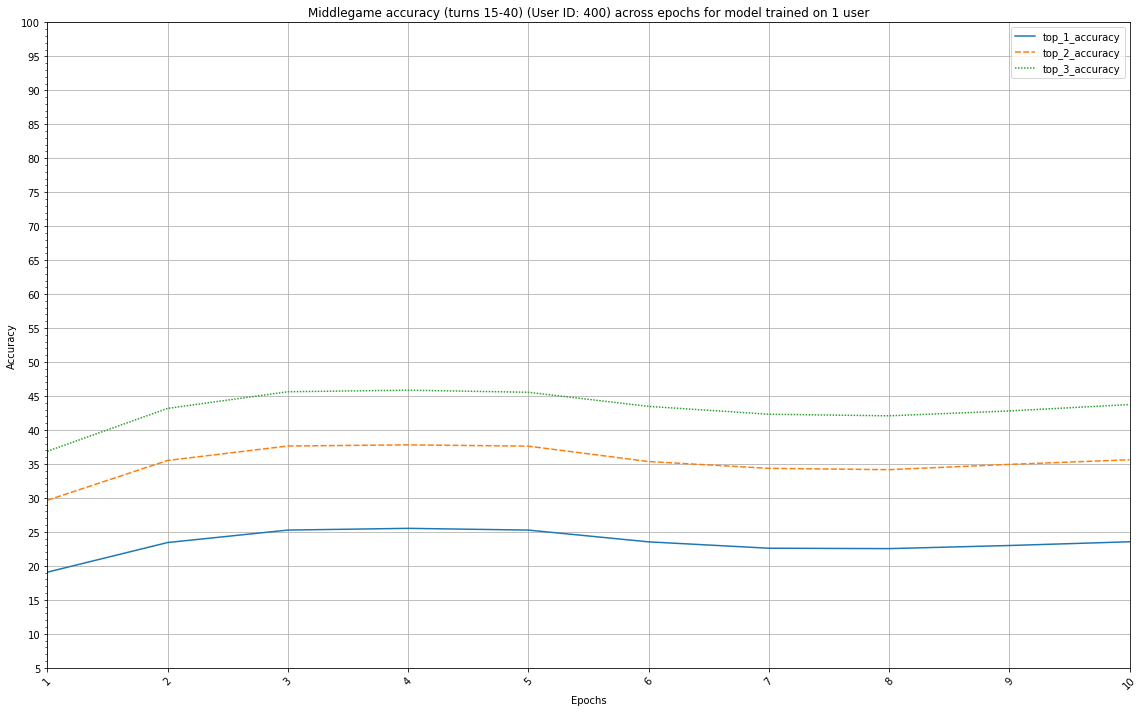

In [84]:
%matplotlib inline
plot_single_accuracy_line(df_middle, top_k_acc, x_label='Epochs',
                          title=(f"Middlegame accuracy (turns {idx_separate[0]}-{idx_separate[1]})"
                                 f" (User ID: {user_id}) across epochs for model trained on 1 user"))

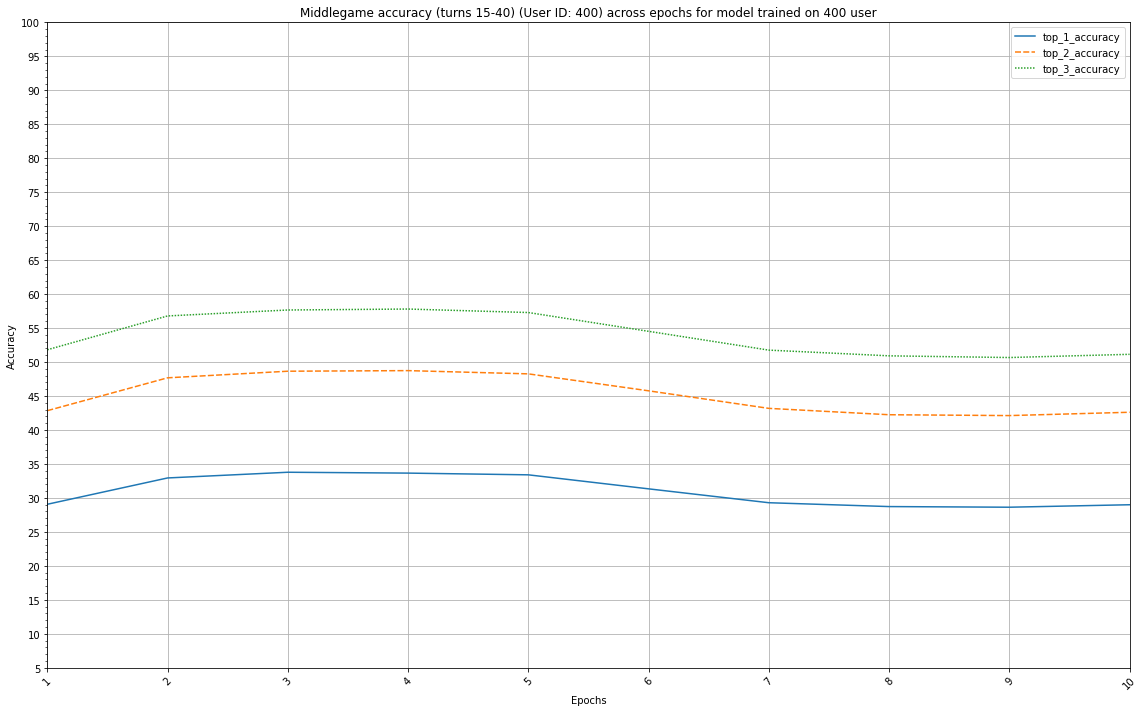

In [92]:
%matplotlib inline
plot_single_accuracy_line(df_middle_400, top_k_acc, x_label='Epochs',
                          title=(f"Middlegame accuracy (turns {idx_separate[0]}-{idx_separate[1]})"
                                 f" (User ID: {user_id}) across epochs for model trained on 400 user"))

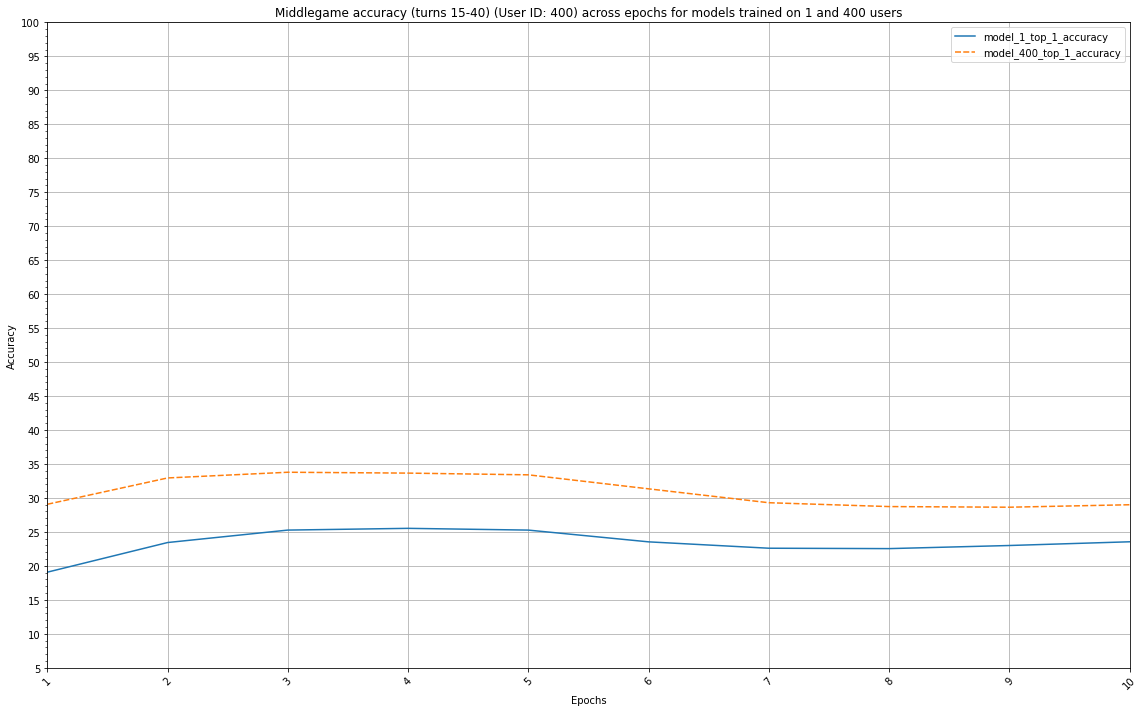

In [93]:
m1_temp_df = df_middle.copy(deep=True)
m1_temp_df.rename(columns=m1_top_k, inplace=True)
m400_temp_df = df_middle_400.copy(deep=True)
m400_temp_df.rename(columns=m400_top_k, inplace=True)
%matplotlib inline
plot_single_accuracy_line(pd.concat([m1_temp_df, m400_temp_df], axis=1),
                          list(m1_top_k.values())[:1] + list(m400_top_k.values())[:1], x_label='Epochs',
                          title=(f"Middlegame accuracy (turns {idx_separate[0]}-{idx_separate[1]}) "
                                 f"(User ID: {user_id}) across epochs for models trained on 1 and 400 users"))

### Endgame accuracy (Upper limit at 100 turns)

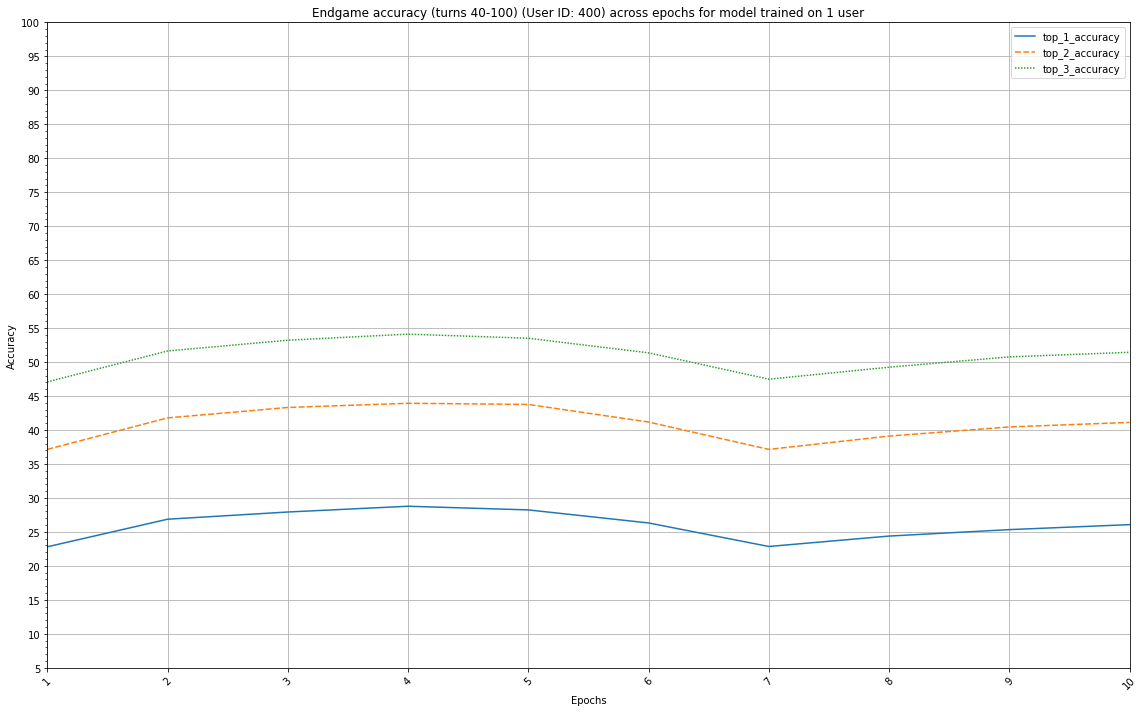

In [85]:
%matplotlib inline
plot_single_accuracy_line(df_end, top_k_acc, x_label='Epochs',
                          title=(f"Endgame accuracy (turns {idx_separate[1]}-{idx_separate[2]})"
                                 f" (User ID: {user_id}) across epochs for model trained on 1 user"))

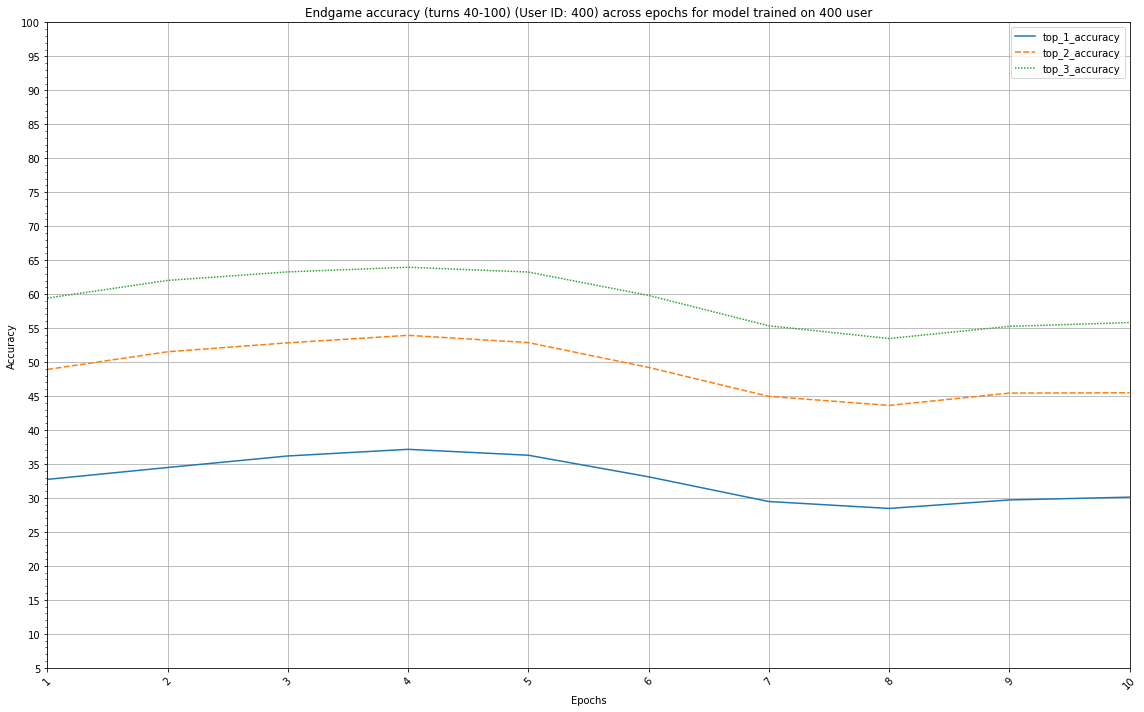

In [94]:
%matplotlib inline
plot_single_accuracy_line(df_end_400, top_k_acc, x_label='Epochs',
                          title=(f"Endgame accuracy (turns {idx_separate[1]}-{idx_separate[2]})"
                                 f" (User ID: {user_id}) across epochs for model trained on 400 user"))

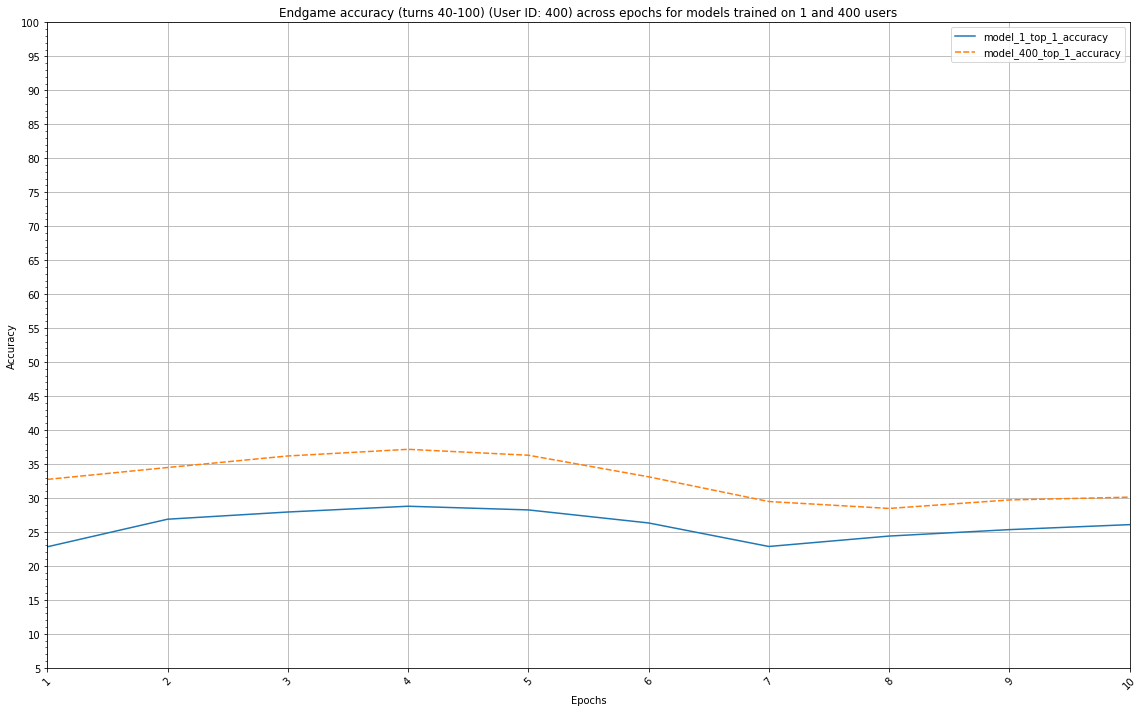

In [98]:
m1_temp_df = df_end.copy(deep=True)
m1_temp_df.rename(columns=m1_top_k, inplace=True)
m400_temp_df = df_end_400.copy(deep=True)
m400_temp_df.rename(columns=m400_top_k, inplace=True)
%matplotlib inline
plot_single_accuracy_line(pd.concat([m1_temp_df, m400_temp_df], axis=1),
                          list(m1_top_k.values())[:1] + list(m400_top_k.values())[:1], x_label='Epochs',
                          title=(f"Endgame accuracy (turns {idx_separate[1]}-{idx_separate[2]}) "
                                 f"(User ID: {user_id}) across epochs for models trained on 1 and 400 users"))

### Endgame accuracy (No upper limit for turns)

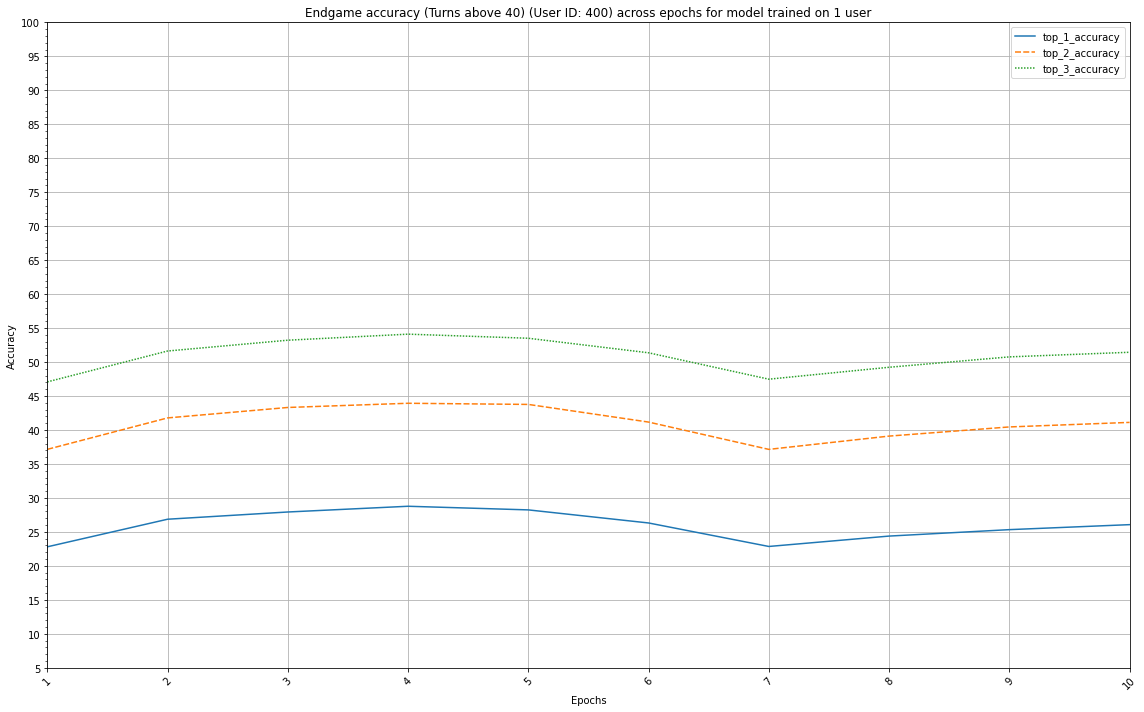

In [86]:
%matplotlib inline
plot_single_accuracy_line(df_end_uncapped, top_k_acc, x_label='Epochs',
                          title=(f"Endgame accuracy (Turns above {idx_separate[1]})"
                                 f" (User ID: {user_id}) across epochs for model trained on 1 user"))

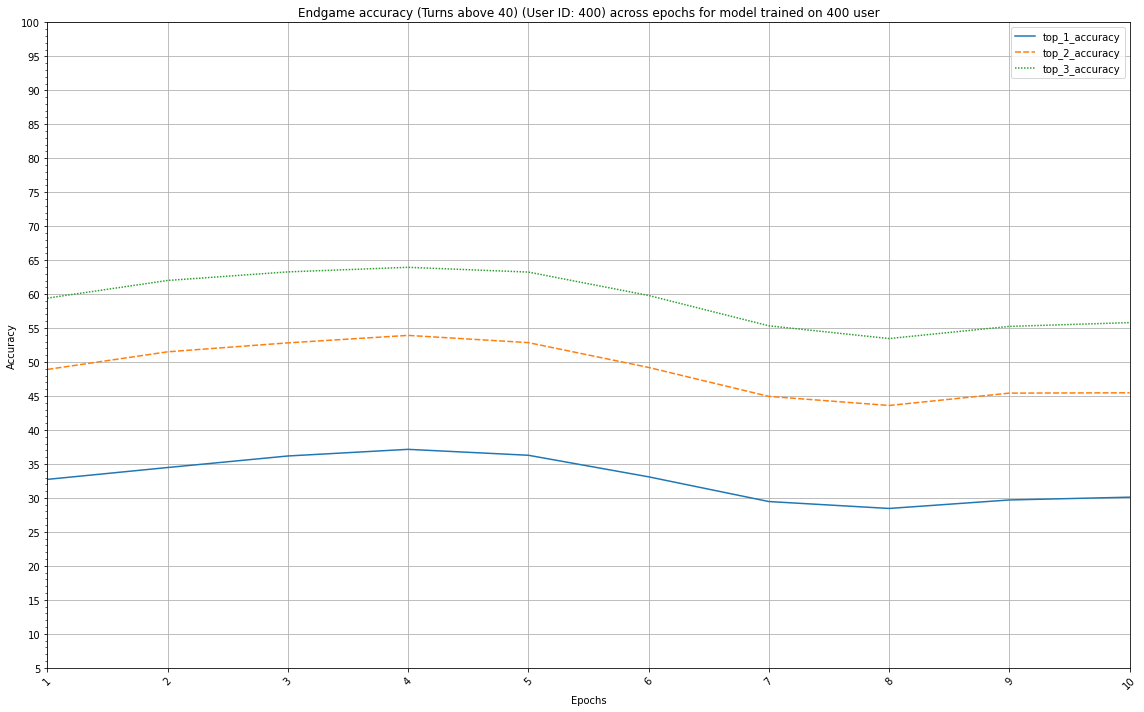

In [96]:
%matplotlib inline
plot_single_accuracy_line(df_end_uncapped_400, top_k_acc, x_label='Epochs',
                          title=(f"Endgame accuracy (Turns above {idx_separate[1]})"
                                 f" (User ID: {user_id}) across epochs for model trained on 400 user"))

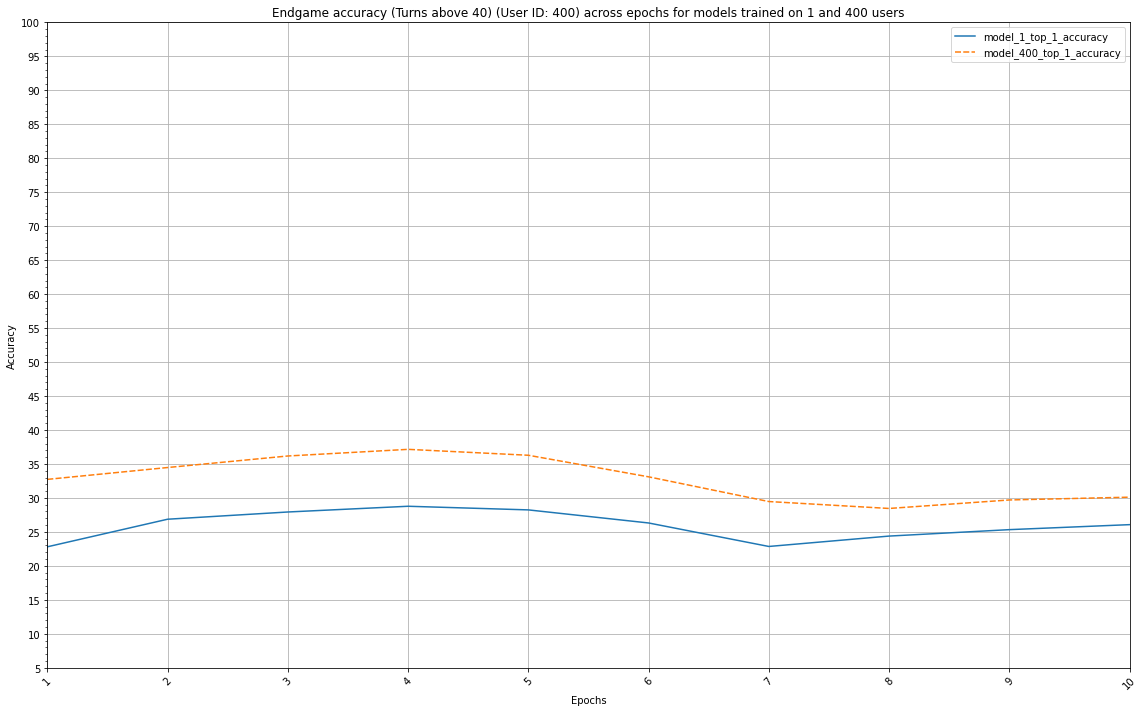

In [99]:
m1_temp_df = df_end_uncapped.copy(deep=True)
m1_temp_df.rename(columns=m1_top_k, inplace=True)
m400_temp_df = df_end_uncapped_400.copy(deep=True)
m400_temp_df.rename(columns=m400_top_k, inplace=True)
%matplotlib inline
plot_single_accuracy_line(pd.concat([m1_temp_df, m400_temp_df], axis=1),
                          list(m1_top_k.values())[:1] + list(m400_top_k.values())[:1], x_label='Epochs',
                          title=(f"Endgame accuracy (Turns above {idx_separate[1]}) "
                                 f"(User ID: {user_id}) across epochs for models trained on 1 and 400 users"))

### Boxplot comparison of game stages

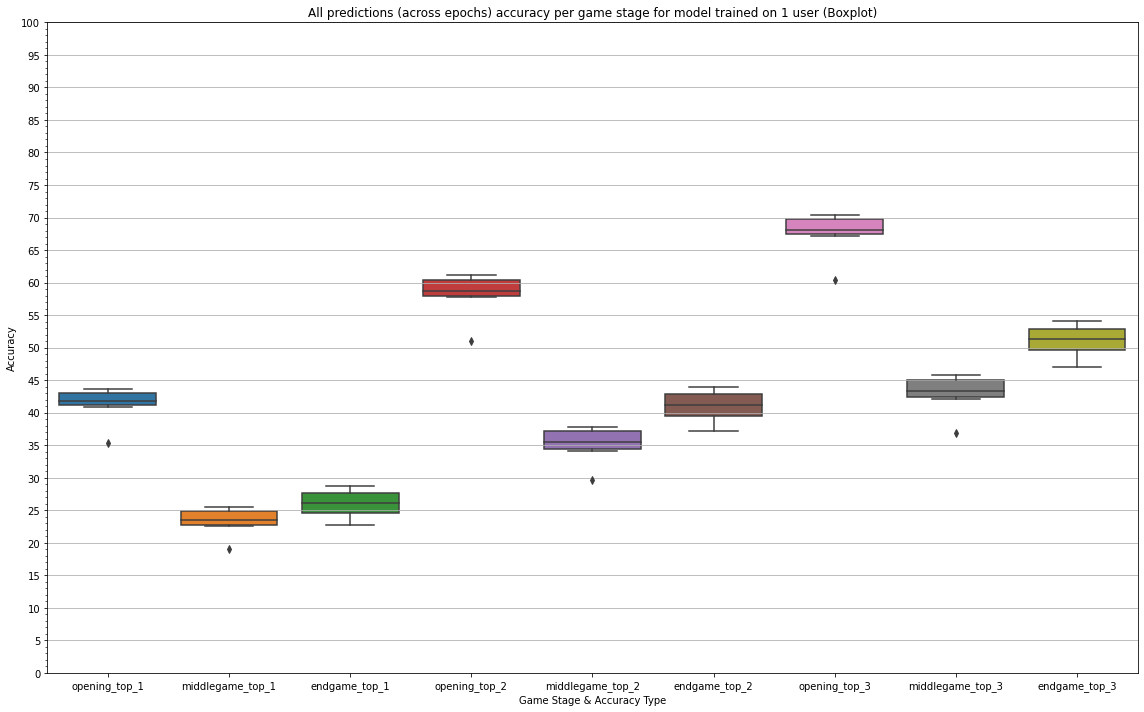

In [104]:
%matplotlib inline
boxplot_game_stages(df_opening, df_middle, df_end,
                    title=("All predictions (across epochs) accuracy per "
                           "game stage for model trained on 1 user (Boxplot)"))

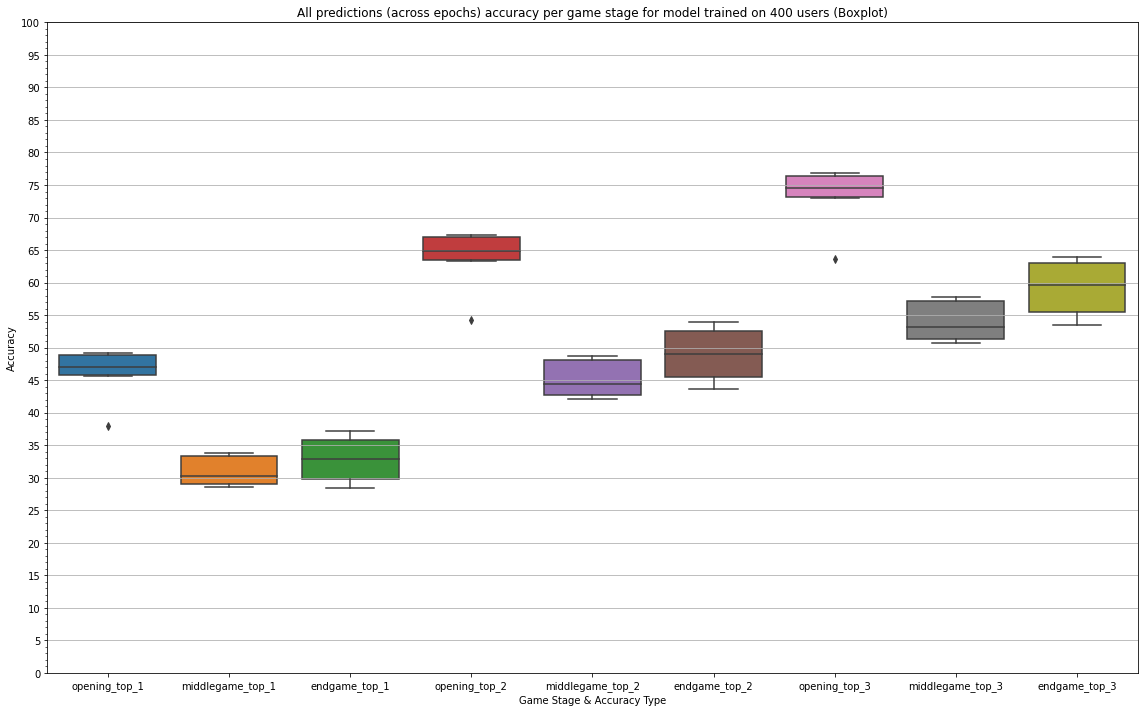

In [103]:
%matplotlib inline
boxplot_game_stages(df_opening_400, df_middle_400, df_end_400,
                    title=("All predictions (across epochs) accuracy per "
                           "game stage for model trained on 400 users (Boxplot)"))